# Lung Cancer Project Prediction

In [199]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import warnings

In [92]:
df = pd.read_csv("survey lung cancer.csv")

In [94]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [96]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [98]:
df.size, df.shape

(4944, (309, 16))

# Getting the data ready

In [101]:
df = df.rename(columns = {"LUNG_CANCER":"target"})
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,target
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [103]:
#YES is 1, NO is 0
df['target'] = df['target'].map({'YES': 1, 'NO': 0})

#M is 1, F is 0
df['GENDER'] = df['GENDER'].map({'M': 1, 'F': 0})
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,target
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [107]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
target                   0
dtype: int64

In [109]:
df.duplicated().sum()

33

In [111]:
df.drop_duplicates(inplace=True)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,target
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,1,2,2,2,1,1,2,2,1,2,1,2,1,1
280,0,59,2,1,1,1,2,2,2,1,1,1,2,1,1,0
281,1,55,2,1,1,1,1,2,2,1,1,1,2,1,2,0
282,1,46,1,2,2,1,1,1,1,1,1,1,1,2,2,0


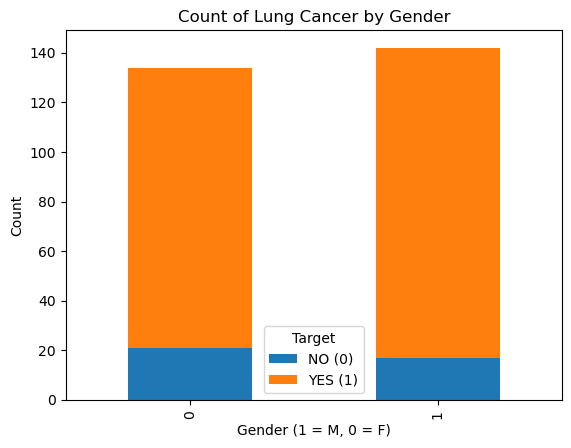

In [115]:
#making a graph to find correlation between Gender and target

gender_target_count = pd.crosstab(df['GENDER'], df['target'])

# Plotting the data
gender_target_count.plot(kind='bar', stacked=True)

plt.title('Count of Lung Cancer by Gender')
plt.xlabel('Gender (1 = M, 0 = F)')
plt.ylabel('Count')
plt.legend(['NO (0)', 'YES (1)'], title='Target')
plt.show()

# Using the scikit cheatsheat, with less than 100k data set, there are two options to work with. SGD Classifier or Kernel Approximation

In [178]:
#Setting up the data set
#Creating the Features var
X = df.drop('target', axis = 1)

#creating the target var
y = df['target']

In [180]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
#splitting the data set, prepping for the model

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)

In [129]:
clf = SGDClassifier()

In [135]:
clf.fit(X_train, y_train);

In [184]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [137]:
clf.score(X_train, y_train)

0.8214285714285714

In [139]:
clf.score(X_test, y_test)

0.8727272727272727

In [188]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds)) #compares y_test with y_prediction

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.85      1.00      0.92       188

    accuracy                           0.85       220
   macro avg       0.43      0.50      0.46       220
weighted avg       0.73      0.85      0.79       220



In [190]:
# Trying different amounts of max_iter
#Results shows that max confidence rating is 87.27% 
warnings.filterwarnings('ignore')

np.random.seed(42)
            #start, stop, step
for i in range(10, 101, 10):
    print(f'Trying model w {i} estimators')
    clf = clf = SGDClassifier(max_iter=i).fit(X_train, y_train)
    print(f'Model Accuracy on test set: {clf.score(X_test, y_test)*100:.2f}%')
    print("")

Trying model w 10 estimators
Model Accuracy on test set: 85.45%

Trying model w 20 estimators
Model Accuracy on test set: 85.45%

Trying model w 30 estimators
Model Accuracy on test set: 85.45%

Trying model w 40 estimators
Model Accuracy on test set: 85.45%

Trying model w 50 estimators
Model Accuracy on test set: 85.45%

Trying model w 60 estimators
Model Accuracy on test set: 85.45%

Trying model w 70 estimators
Model Accuracy on test set: 85.45%

Trying model w 80 estimators
Model Accuracy on test set: 85.45%

Trying model w 90 estimators
Model Accuracy on test set: 85.45%

Trying model w 100 estimators
Model Accuracy on test set: 85.45%



In [192]:
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.85714286 0.87272727 0.89090909 0.85454545 0.85454545]
Mean score: 0.8659740259740258


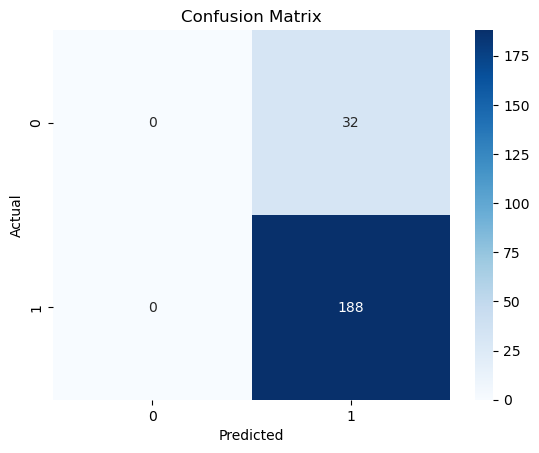

In [194]:
from sklearn.metrics import confusion_matrix
# Predict on the test set
y_pred = clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [196]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.0001, 0.001, 0.01], 'penalty': ['l2', 'elasticnet']}
grid_search = GridSearchCV(SGDClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'alpha': 0.0001, 'penalty': 'l2'}


# Conclusion:

## Chose SGDClassifier (Stochastic Gradient Descent) for my model, which is suitable for this data set with less than 100k dataset
## This study achieved the following:
    * Training Accuracy: 82.14%
    * Test Accuracy: 87.27%
## This indicates that SGDClassifier performed well with the given data (Data split: 80% train : 20% test)

# Further Improvements: 
    * Find a better model to try to achieve for > 93% confidence
    * Produce more data visuals (graphs, show correlations etc)
    * Change 1 and 2s from the columns 0 and 1s to represent YES or NOs (this change can further improve the model)
    * Experiment with different numbers of iterations for the model (max_iter)